# Multiple linear regression

Let's now investigate **multiple linear regression** (MLR), where several output depends on more than one input variable:

$$
\begin{cases}
y_1 = w_1 \, x_1 + w_2 \, x_2 + b_1\\
\\
y_2 = w_3 \, x_1 + w_4 \, x_2 + b_2\\
\end{cases}
$$

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as the crime rate (CRIM), the proportion of non-retail business acres per town (INDUS), the proportion of owner-occupied units built prior to 1940 (AGE) and several other attributes. It is available here : <https://archive.ics.uci.edu/ml/machine-learning-databases/housing>.

The Boston dataset can be directly downloaded from scikit-learn:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
t = boston.target

print(X.shape)
print(t.shape)

(506, 13)
(506,)


There are 506 samples with 13 inputs and one output (the price). The following cell decribes what the features are:

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The following cell allows to visualize how each feature influences the price individually:

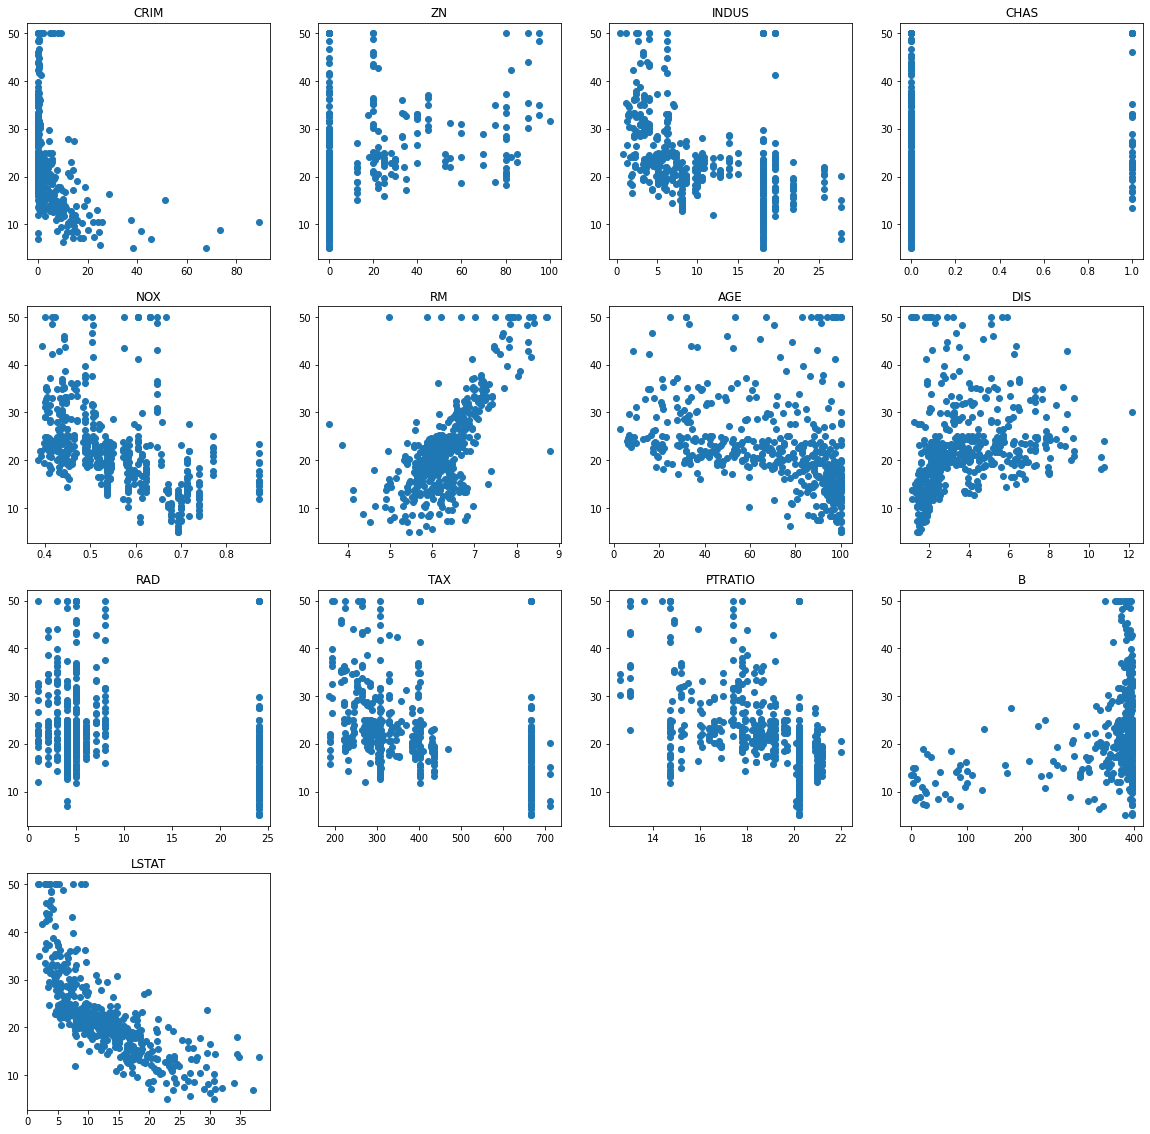

In [3]:
plt.figure(figsize=(20, 20))

for i in range(13):
    plt.subplot(4, 4 , i+1)
    plt.scatter(X[:, i], t)
    plt.title(boston.feature_names[i])
plt.show()

## Linear regression

**Q:** Apply MLR on the Boston data using the same `LinearRegression` method of `scikit-learn` as last time. Print the mse and visualize the prediction $y$ against the true value $t$ for each sample as before. Does it work?

You will also plot the weights of the model (`reg.coef_`) and conclude on the relative importance of the different features: which feature has the stronger weight and why?

A good practice in machine learning is to **normalize** the inputs, i.e. to make sure that the samples have a mean of 0 and a standard deviation of 1. `scikit-learn` provides a method named `scale` that does it automatically:

In [5]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

**Q:** Apply MLR again on `X_scaled`, print the mse and visualize the weights. What has changed?

## Regularized regression

Now is time to investigate **regularization**:
1. MLR with L2 regularization is called **Ridge regression**
2. MLR with L1 regularization is called **Lasso regression** 

Fortunately, `scikit-learn` provides these methods with a similar interface to `LinearRegression`. The `Ridge` and `Lasso` objects take an additional argument `alpha` which represents the regularization parameter:

```python
reg = Ridge(alpha=0.1)
reg = Lasso(alpha=0.1)
```

In [7]:
from sklearn.linear_model import Ridge, Lasso

**Q:** Apply Ridge and Lasso regression on the scaled data, vary the regularization parameter to understand its function and comment on the results. In particular, increase the regularization parameter for LASSO and identify the features which are the most predictive of the price. Does it make sense?  